In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 61s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


y_train = y_train.flatten()
y_test = y_test.flatten()

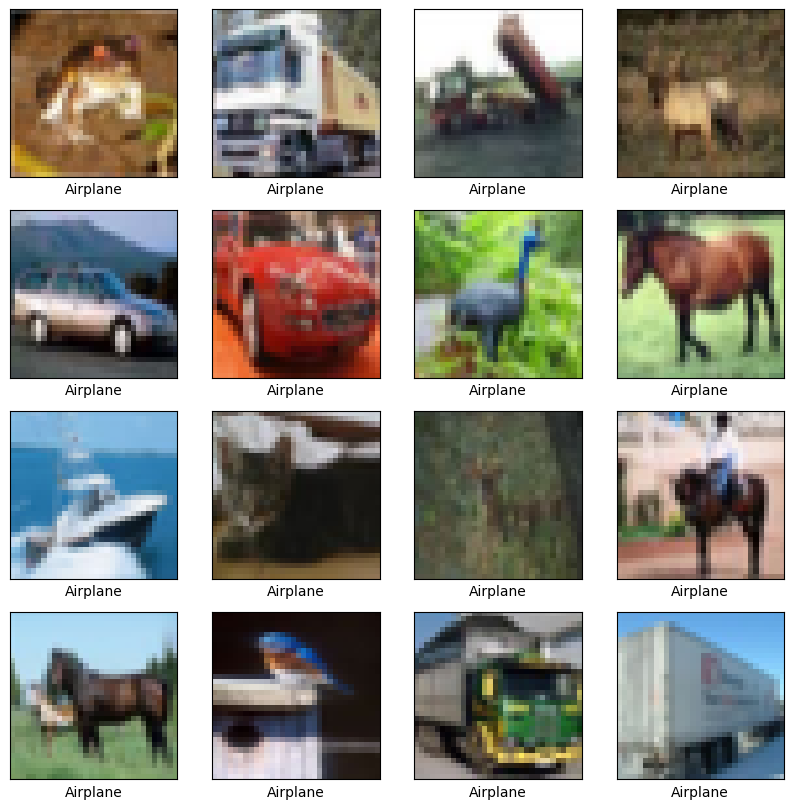

In [4]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [5]:
len((X_train).shape)

4

In [6]:
def l2_Euclidean_distance(p,q):
  return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))


class KNN:
  def __init__(self, k=3):
    self.k = k
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = X.reshape(X.shape[0], -1)
    self.y_train = np.array(y)

  def predict_single(self, x_test):
        # Flatten the test image
        x_test_flat = x_test.reshape(-1)

        # distances to ALL training points
        distances = []
        for i in range(len(self.X_train)):
            dist = l2_Euclidean_distance(self.X_train[i], x_test_flat)
            distances.append((dist, self.y_train[i]))

        # Sort by distance
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]

        # Get labels of k nearest neighbors
        knn_labels = [label for _, label in k_nearest]

        # Find most common label
        most_common = Counter(knn_labels).most_common(1)
        return most_common[0][0] if most_common else -1

  def predict(self, X_test):
       predictions = []
       # Process each test image
       for i in range(len(X_test)):
         pred = self.predict_single(X_test[i])
         predictions.append(pred)

       return np.array(predictions)



In [8]:
# This part of Code is Collected From DeepSeek
def run_knn_example():
    # Take smaller subsets for testing
    n_train = 10000  # Number of training samples
    n_test = 500    # Number of test samples

    X_train_sub = X_train[:n_train]
    y_train_sub = y_train[:n_train]
    X_test_sub = X_test[:n_test]
    y_test_sub = y_test[:n_test]

    print(f"\nUsing subset: {n_train} training, {n_test} test")

    # Create and train KNN
    knn = KNN(k=5)
    knn.fit(X_train_sub, y_train_sub)

    # Predict using fast method
    print("Predicting...")
    predictions = knn.predict(X_test_sub)

    # Calculate accuracy
    accuracy = np.mean(predictions == y_test_sub)
    print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

    # Class names for CIFAR-10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # Show some examples
    print("\nSample predictions:")
    for i in range(min(5, len(predictions))):
        pred_name = class_names[predictions[i]]
        true_name = class_names[y_test_sub[i]]
        print(f"  Image {i}: Predicted '{pred_name}' ({predictions[i]}) | Actual '{true_name}' ({y_test_sub[i]})")

    return knn, predictions, accuracy

# Run the example
knn_model, preds, acc = run_knn_example()


Using subset: 10000 training, 500 test
Predicting...

Accuracy: 0.3240 (32.40%)

Sample predictions:
  Image 0: Predicted 'deer' (4) | Actual 'cat' (3)
  Image 1: Predicted 'ship' (8) | Actual 'ship' (8)
  Image 2: Predicted 'ship' (8) | Actual 'ship' (8)
  Image 3: Predicted 'ship' (8) | Actual 'airplane' (0)
  Image 4: Predicted 'deer' (4) | Actual 'frog' (6)
